# Titanic Survival Prediction

# 1. Background and Problem Statement

The Titanic, famously dubbed the 'Unsinkable Ship,' tragically collided with an iceberg during its maiden voyage in 1912, resulting in the loss of approximately 1502 out of 2224 passengers and crew. <br>This project harnesses machine learning to predict passenger survival on the Titanic, dissecting factors such as age, gender, class, and more.The goal is to unveil the critical factors influencing survival during this historic event, utilizing the Titanic dataset for analysis and insights.

# 2. Importing Data & Libraries

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

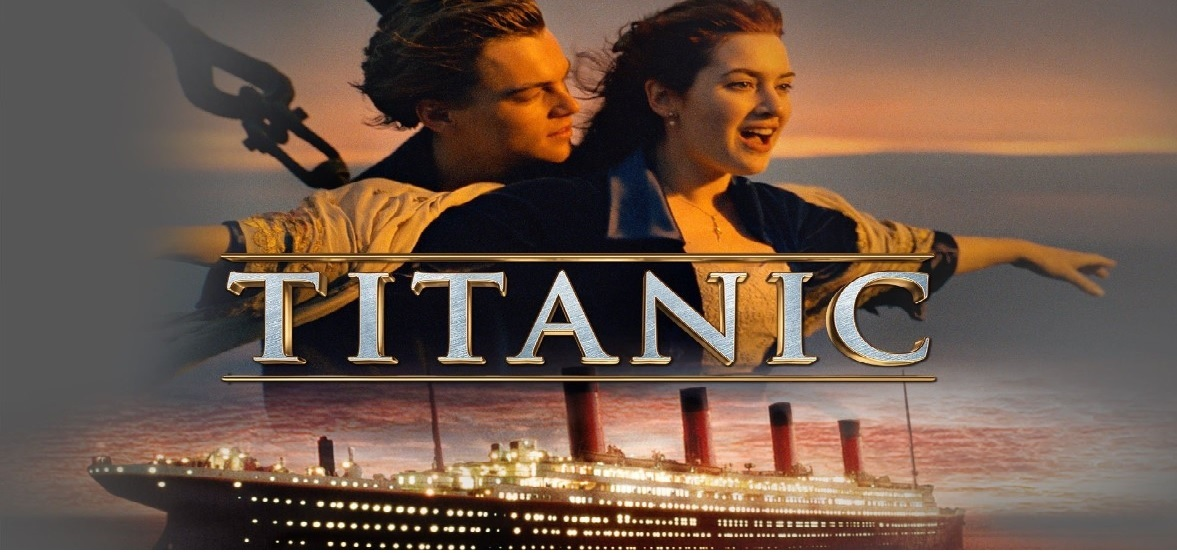

In [2]:
from IPython.display import Image
Image("Titanic.jpg")

In [3]:
df = pd.read_csv("Titanic Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Data Understanding

In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


we observe there are missing values (non-null count less than 418) in the 'Age,' 'Fare,' 'Cabin,' columns. 

**Data Classification by Type: Numeric and Categorical Columns**

In [6]:
df_numeric = df.select_dtypes(np.number)
df_categoric = df.select_dtypes(np.object)

print("Numeric Data :",df_numeric.columns)
print()
print("Categoric Data :",df_categoric.columns)

Numeric Data : Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Categoric Data : Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


**Exploring Key Columns: Unique Values and Data Types**

In [7]:
columns_to_check = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_check:
    unique_values = df[column].unique() 
    data_type = df[column].dtype        
    
    print(f"Column: {column}")
    print("Unique Values:", unique_values)
    print("Data Type:", data_type)
    print()

Column: Survived
Unique Values: [0 1]
Data Type: int64

Column: Pclass
Unique Values: [3 2 1]
Data Type: int64

Column: Sex
Unique Values: ['male' 'female']
Data Type: object

Column: SibSp
Unique Values: [0 1 2 3 4 5 8]
Data Type: int64

Column: Parch
Unique Values: [0 1 3 2 4 6 5 9]
Data Type: int64

Column: Embarked
Unique Values: ['Q' 'S' 'C']
Data Type: object



In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


we observe that a minimumn fare is  0 indicates that certain passengers traveled without incurring ticket costs, potentially crew members, individuals with special arrangements, or specific passenger categories.

In [9]:
df.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Fare             1
Age             86
Cabin          327
dtype: int64

In [10]:
df.isnull().mean().sort_values() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
Fare            0.239234
Age            20.574163
Cabin          78.229665
dtype: float64

Note:-<br>
    1) Around 78.2% Data is Missing from Cabin Column<br>
    2) Around 20.5% Data is Missing from Age Column<br>
    3) Around 0.23% Data is Missing from Fare Column

# 4. Exploratory Data Analysis (EDA)

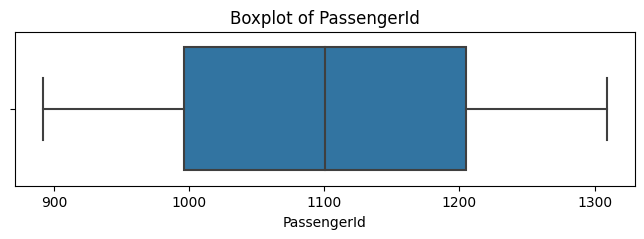

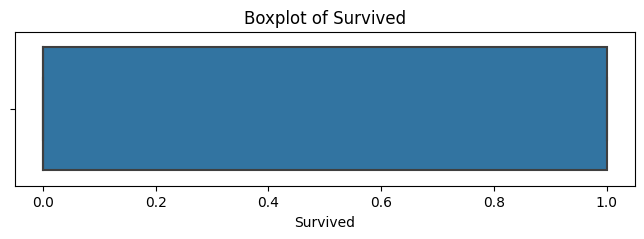

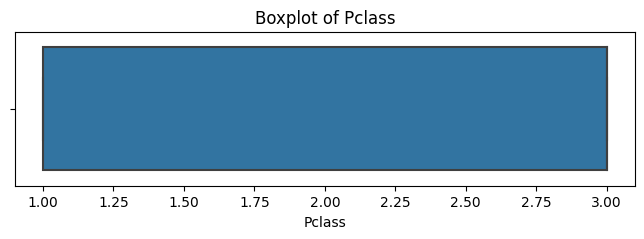

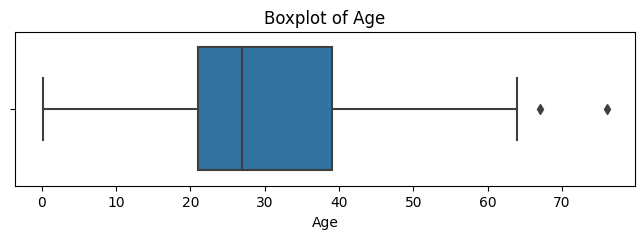

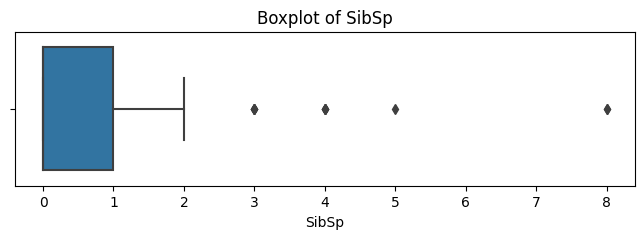

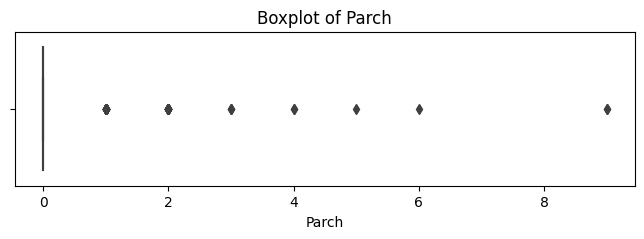

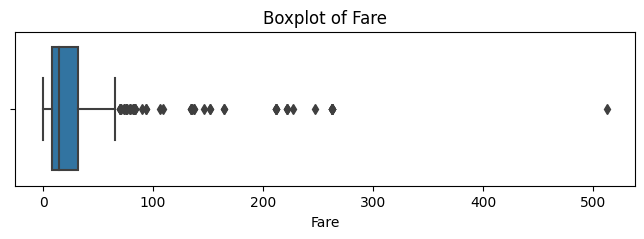

In [11]:
numerical_columns = df.select_dtypes(include=np.number)

for column in numerical_columns:
    plt.figure(figsize=(8, 2))  
    sns.boxplot(x=df[column], orient='h')  
    plt.title(f'Boxplot of {column}')
    plt.show()

**Note** : Age, SibSp, Parch, and Fare exhibit outliers in the Titanic dataset, indicating unusual or extreme values in these numerical features<br>Imputing missing values in 'Age' and 'Fare' using the median, accounting for outliers.

In [12]:
df['Age'] = df['Age'].fillna(df.Age.median())

In [13]:
df['Fare'] = df['Fare'].fillna(df.Fare.median())

In [14]:
df['Fare'] = df['Fare'].round(2)

Dealing with the 75% missing 'Cabin' values in the Titanic dataset, labeling them as 'M' represents 'Missing values'.

In [15]:
df['Cabin'].fillna('Unknown', inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Now that all missing values in the dataset have been addressed and resolved.**

In [17]:
df['Age'] = df['Age'].astype(int)

# 5. Data Visualization

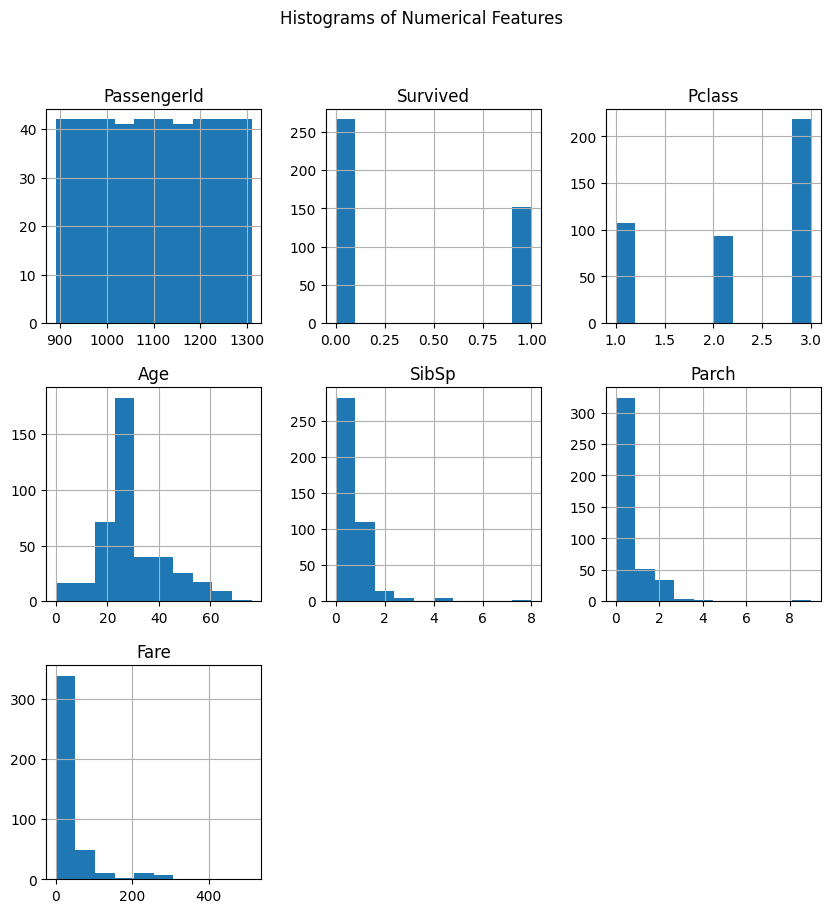

In [18]:
df.hist (figsize = (10,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

**Observations:**

1. The majority of passengers did not survive the tragedy.<br>
2. Most passengers were in the 3rd class.<br>
3. A significant number of passengers traveled alone without any siblings, spouses, parents, or children.<br>
4. The age range of the majority of passengers was between 20 and 30 years old, categorizing them as young adults.<br>
5. The majority of passengers paid lower fares for their voyage.gers were travelling alone with no Siblings, spouse, parents, and childerns.

**How many male and female passengers?**

In [19]:
gender = df['Sex'].value_counts()
gender

male      266
female    152
Name: Sex, dtype: int64

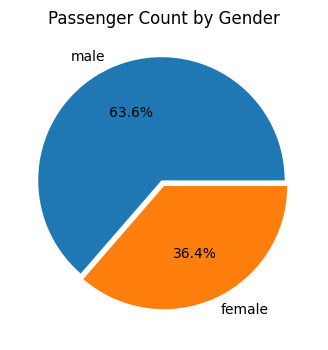

In [20]:
gender_counts = df['Sex'].value_counts()
explode = (0.05, 0)
plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%',explode=explode)
plt.title("Passenger Count by Gender")
plt.show() 

**How many survived and how many didn't?**

In [21]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

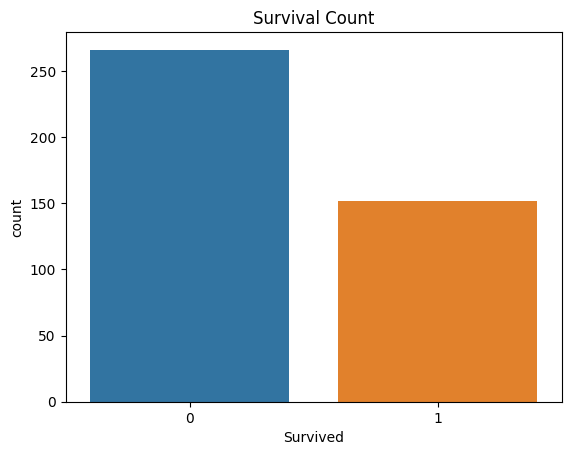

In [22]:
sns.countplot(x=df['Survived'])
plt.title("Survival Count")
plt.show()

**Where did most passengers board?**

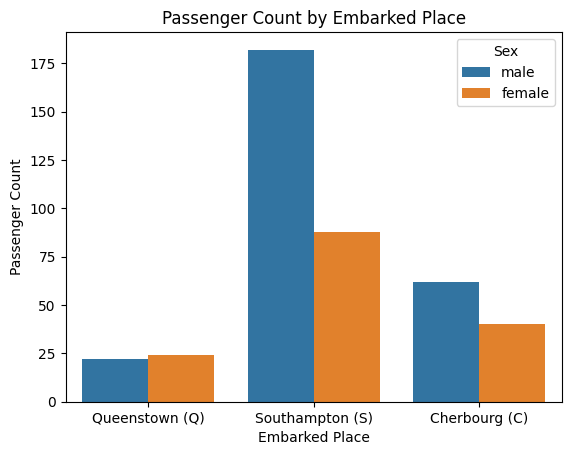

In [23]:
ax = sns.countplot(x=df['Embarked'], hue=df['Sex'])
plt.title("Passenger Count by Embarked Place")
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Queenstown (Q)', 'Southampton (S)', 'Cherbourg (C)'])
plt.xlabel("Embarked Place")
plt.ylabel("Passenger Count")
plt.show()

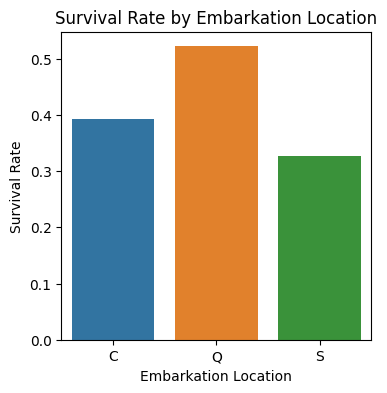

In [24]:
survival_embark = df.groupby('Embarked')['Survived'].mean()
plt.figure(figsize=(4, 4))
sns.barplot(x=survival_embark.index, y=survival_embark.values)
plt.title("Survival Rate by Embarkation Location")
plt.xlabel("Embarkation Location")
plt.ylabel("Survival Rate")
plt.show()

Despite fewer passengers boarding from Queenstown (Q), they had a higher survival rate, suggesting potential factors like demographics or assistance in the evacuation process.

**How did survival rates vary by passenger class?**

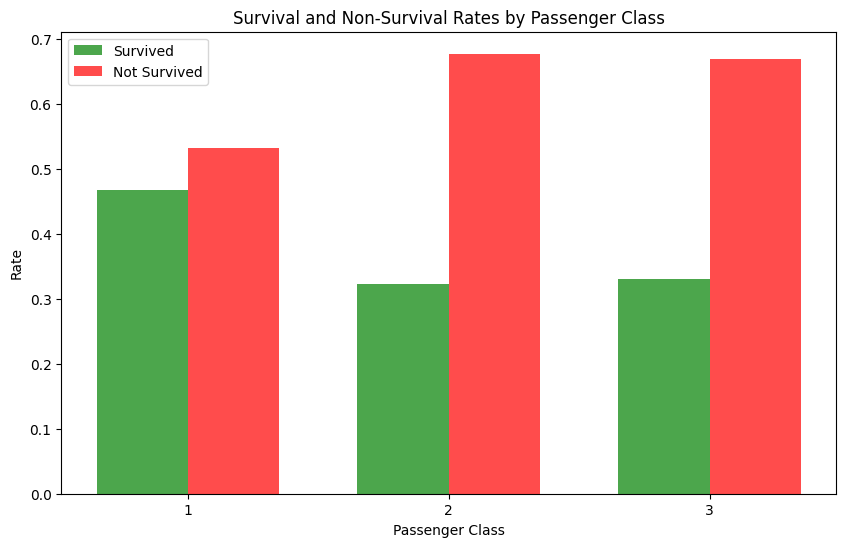

In [25]:
survival_rates = df.groupby('Pclass')['Survived'].mean()
non_survival_rates = 1 - survival_rates

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = survival_rates.index

plt.bar(index, survival_rates, label='Survived', width=bar_width, color='green', alpha=0.7)
plt.bar(index + bar_width, non_survival_rates, width=bar_width, label='Not Survived', color='red', alpha=0.7)

plt.xlabel('Passenger Class')
plt.ylabel('Rate')
plt.title('Survival and Non-Survival Rates by Passenger Class')
plt.xticks(index + bar_width / 2, index)
plt.legend()
plt.show()


First-class passengers showed a higher survival rate compared to other classes, highlighting a possible correlation between class and survival.

**What is the age distribution of the passengers who survived?**

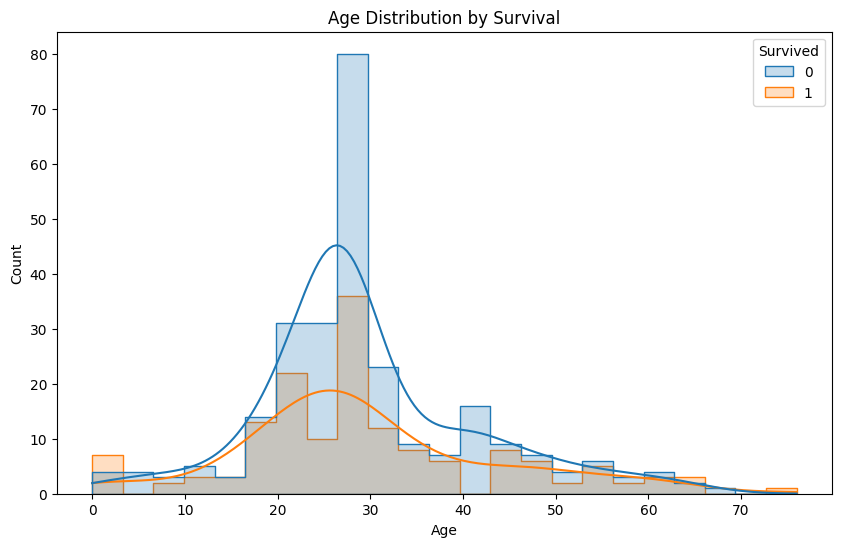

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x='Age',hue = 'Survived',kde = True, element='step', common_norm=False)
plt.title("Age Distribution by Survival")
plt.show()

The age distribution curve indicates a peak in young adult ages (around 20-30 years). The survival rate on the Titanic decreased with age.

**How does fare distribution correlate with passenger survival?**

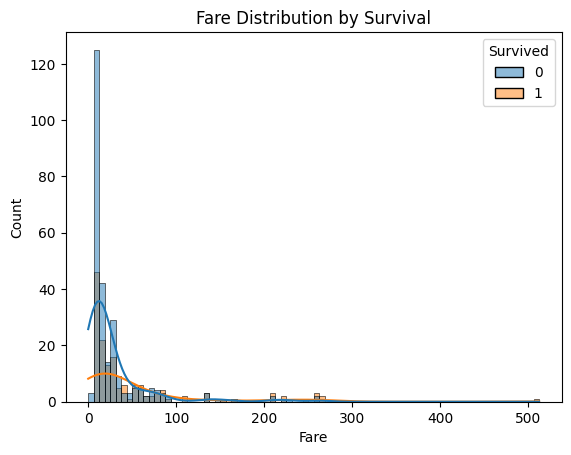

In [27]:
sns.histplot(data = df, x='Fare',hue = 'Survived',kde = True)
plt.title("Fare Distribution by Survival")
plt.show()

Higher fare passengers were more likely to survive the Titanic sinking because they were more likely to be in first or second class.

**Distribution of passengers based on the number of SibSp and Parch**

Text(0, 0.5, 'Passenger count')

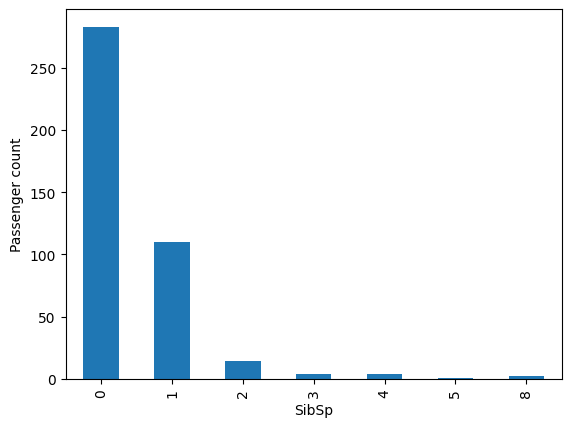

In [28]:
plt = df['SibSp'].value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Passenger count')

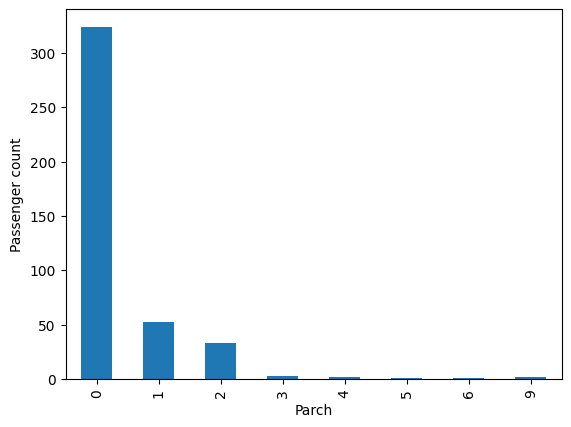

In [29]:
plt = df['Parch'].value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger count')

Most passengers traveled alone, followed by those with one sibling or spouse.

**Did having family (Parch, SibSp) affect survival?**

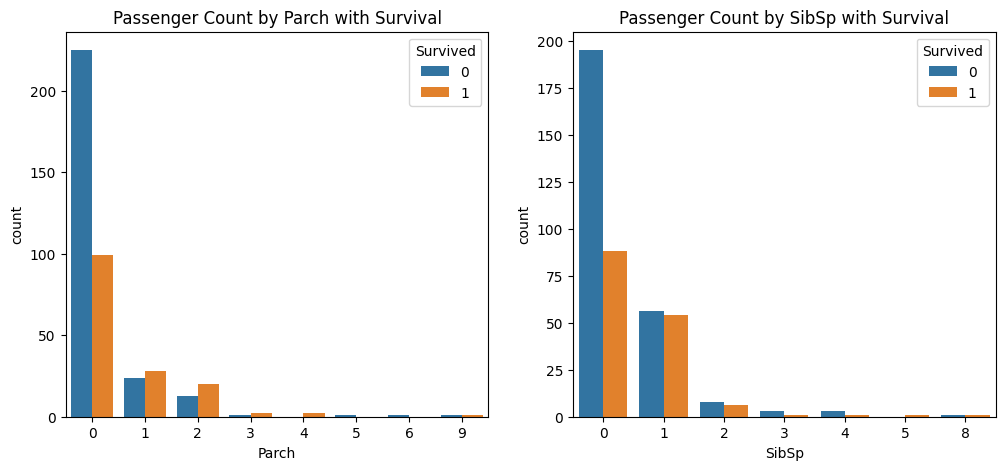

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=df['Parch'], hue=df['Survived'], ax=ax[0])
ax[0].set_title("Passenger Count by Parch with Survival")

sns.countplot(x=df['SibSp'], hue=df['Survived'], ax=ax[1])
ax[1].set_title("Passenger Count by SibSp with Survival")

plt.show()

Families were given priority when loading the lifeboats, so passengers traveling with more parents and children were more likely to survive.

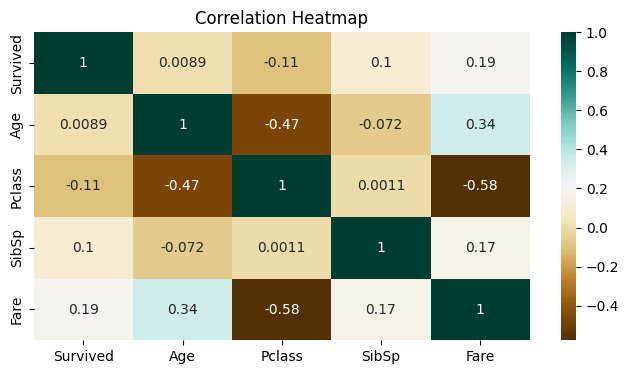

In [34]:
columns = ['Survived','Age','Pclass','SibSp','Fare']
subset = df[columns]
fig = plt.figure (figsize =(8,4))
sns.heatmap(subset.corr(), cmap='BrBG', annot=True)
plt.title("Correlation Heatmap")
plt.show()

Passengers who were younger (Age) had a higher survival rate than older passengers.<br>
Passengers in higher classes were more likely to survive.<br>
Passengers who traveled with siblings or spouses (SibSp) had a higher survival rate than those who traveled alone.<br>
Passengers who paid higher fares (Fare) also had a higher survival rate

In [35]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.83,Unknown,Q


# 6. Feature Engineering

**i. Title:**
**Extract the title (e.g., Mr., Mrs., etc.) from the 'Name' feature.**

In [36]:
import re

In [37]:
df['Title'] = df.Name.apply(lambda x: re.search('([A-Z][a-z]+)\.',x).group(1))

In [38]:
df.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

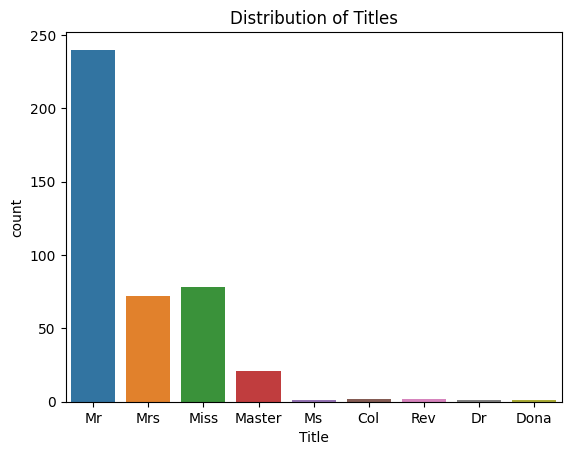

In [39]:
sns.countplot(data = df, x = 'Title')
plt.title('Distribution of Titles')
plt.show()

We can  group titles in the **'Title'** column based on common categories

In [40]:
def group_titles(title):
    if title in ['Mr','Col','Rev']:
        return 'Mr'
    elif title in ['Miss','Ms']:
        return 'Miss'
    elif title == 'Mrs':
        return 'Mrs'
    else:
        return title
    
df['Title'] = df['Title'].apply(group_titles)

In [41]:
df['Title'].value_counts()

Mr        244
Miss       79
Mrs        72
Master     21
Dr          1
Dona        1
Name: Title, dtype: int64

**ii. Cabin Deck:**
**Extract the deck from the 'Cabin' feature, considering the first character of the 'Cabin' values as the deck.**

In [42]:
df['Cabin_Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')

In [43]:
df.Cabin_Deck.value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin_Deck, dtype: int64

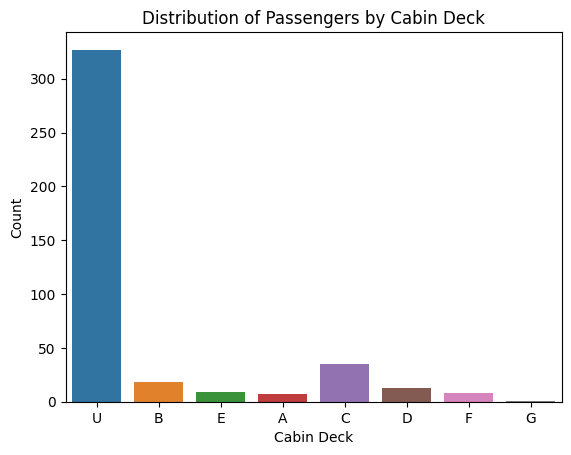

In [44]:
sns.countplot(data=df, x = 'Cabin_Deck')
plt.xlabel('Cabin Deck')
plt.ylabel('Count')
plt.title('Distribution of Passengers by Cabin Deck')
plt.show()

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_Deck
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.83,Unknown,Q,Mr,U
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.00,Unknown,S,Mrs,U
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.69,Unknown,Q,Mr,U
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.66,Unknown,S,Mr,U
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.29,Unknown,S,Mrs,U


Dropping the Columns
1. Passenger ID, Ticket we are dropping as we dont required for our model
2. Name we are dropping as we have fetched out the Title column from it and we dont required another info from Name column
3. Cabin can be droped as we have extracted Cadin_Deck  and don't required anyother info from Cabin column

In [46]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1, inplace =  True)

In [47]:
#Rearrangeing the Columns
desired_order = ['Title', 'Sex', 'Age','Embarked', 'Pclass', 'SibSp', 'Parch', 'Cabin_Deck', 'Fare', 'Survived']
df = df.reindex(columns = desired_order)

In [48]:
df.head(1)

,Title,Sex,Age,Embarked,Pclass,SibSp,Parch,Cabin_Deck,Fare,Survived
0,Mr,male,34,Q,3,0,0,U,7.83,0


# 7. Data Preprocessing 

We observe that the dataset contains categorical columns (Title, Sex, Embarked, Cabin). <br>To prepare them for further processing, we'll convert them into numerical representations using label encoder.

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
label_encoder = LabelEncoder()

In [51]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [52]:
title_mapping = {
                'Mr':0,
                'Miss':1,
                'Mrs':2,
                'Master':3,
                'Dr':4,
                'Dona':5
                }
df['Title'] = df['Title'].map(title_mapping)

cabin_deck_mapping = {
                       'A': 0,
                       'B': 1,
                       'C': 2,
                       'D': 3,
                       'E': 4,
                       'F': 5,
                       'G': 6,
                       'U': 7
                    }
df['Cabin_Deck'] = df['Cabin_Deck'].map(cabin_deck_mapping)

In [53]:
df.head()

,Title,Sex,Age,Embarked,Pclass,SibSp,Parch,Cabin_Deck,Fare,Survived
0,0,1,34,1,3,0,0,7,7.83,0
1,2,0,47,2,3,1,0,7,7.00,1
2,0,1,62,1,2,0,0,7,9.69,0
3,0,1,27,2,3,0,0,7,8.66,0
4,2,0,22,2,3,1,1,7,12.29,1


All columns have been successfully converted to numeric representations, paving the way for model training and prediction.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Split features and target
X = df.drop('Survived', axis=1)
Y = df['Survived']

In [56]:
print("Features the Model Has Been Trained On:",X.columns)
X

Features the Model Has Been Trained On: Index(['Title', 'Sex', 'Age', 'Embarked', 'Pclass', 'SibSp', 'Parch',
       'Cabin_Deck', 'Fare'],
      dtype='object')


,Title,Sex,Age,Embarked,Pclass,SibSp,Parch,Cabin_Deck,Fare
0,0,1,34,1,3,0,0,7,7.83
1,2,0,47,2,3,1,0,7,7.00
2,0,1,62,1,2,0,0,7,9.69
3,0,1,27,2,3,0,0,7,8.66
4,2,0,22,2,3,1,1,7,12.29
...,...,...,...,...,...,...,...,...,...
413,0,1,27,2,3,0,0,7,8.05
414,5,0,39,0,1,0,0,2,108.90
415,0,1,38,2,3,0,0,7,7.25
416,0,1,27,2,3,0,0,7,8.05


In [57]:
print("Target Variable the Model Predicts:",Y.name)
Y

Target Variable the Model Predicts: Survived


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 25)

# 8. Model Training

In [59]:
# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train.values, Y_train)

LogisticRegression()

In [60]:
print("Model Trained by Logistic Regression")

Model Trained by Logistic Regression


In [61]:
Y_test 

23     0
73     0
97     0
393    0
285    0
      ..
24     1
112    1
194    0
111    1
48     1
Name: Survived, Length: 84, dtype: int64

In [62]:
# Predict on the test set
Y_pred = lr.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [63]:
# Compare predicted and actual values
comparison_df = pd.DataFrame({'Predicted': Y_pred, 'Actual': Y_test})
print(comparison_df)

     Predicted  Actual
23           0       0
73           0       0
97           0       0
393          0       0
285          0       0
..         ...     ...
24           1       1
112          1       1
194          0       0
111          1       1
48           1       1

[84 rows x 2 columns]


# 9. Model Evaluation

In [64]:
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(Y_test, Y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        36

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# 10. Model Prediction

In [65]:
# Define the mapping for categorical variables (use the same mapping used during training)
sex_mapping = {'male': 1, 'female': 0}
embarked_mapping = {'Q': 0, 'S': 1, 'C': 2}
cabin_deck_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'U': 7}
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Dona': 5}

In [67]:
# Function to get user input for prediction
def get_user_input():
    print("Welcome to Titanic Survival Prediction!")
    print("Enter your details for Prediction:\n")
    title = input("Enter Title (e.g., 'Mr', 'Mrs','Miss','Dr'): ")
    sex = input("Enter Sex (male/female): ")
    age = float(input("Enter Age: "))
    embarked = input("Enter Embarked (e.g., 'Q', 'S', 'C'): ")
    pclass = int(input("Enter Pclass: "))
    sibsp = int(input("Enter SibSp: "))
    parch = int(input("Enter Parch: "))
    cabin_deck = input("Enter Cabin_Deck (e.g., 'A', 'B', 'U'): ")
    fare = float(input("Enter Fare:"))

    # Map the categorical input to numerical values
    sex_mapped = sex_mapping.get(sex)  
    embarked_mapped = embarked_mapping.get(embarked)  
    cabin_deck_mapped = cabin_deck_mapping.get(cabin_deck)  
    title_mapped = title_mapping.get(title)  

    # Create a dictionary from the user input
    user_input = {
        'Title': [title_mapped],
        'Sex': [sex_mapped],
        'Age': [age],
        'Embarked': [embarked_mapped],
        'Pclass': [pclass],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Cabin_Deck': [cabin_deck_mapped],
        'Fare': [fare]
    }

    return pd.DataFrame(user_input)

try:
    user_data = get_user_input()

    if user_data.isnull().values.any():
        raise ValueError("Input contains NaN values. Please provide valid input.")

    prediction = lr.predict(user_data)

    if prediction[0] == 0:
        print('The passenger is predicted to have NOT SURVIVED')
    else:
        print('The passenger is predicted to have SURVIVED')

except ValueError as e:
    print(str(e))
except Exception as e:
    print(f"An error occurred: {str(e)}")

Welcome to Titanic Survival Prediction!
Enter your details for Prediction:

Enter Title (e.g., 'Mr', 'Mrs','Miss','Dr'): Mr
Enter Sex (male/female): male
Enter Age: 30
Enter Embarked (e.g., 'Q', 'S', 'C'): Q
Enter Pclass: 1
Enter SibSp: 2
Enter Parch: 0
Enter Cabin_Deck (e.g., 'A', 'B', 'U'): A
Enter Fare:6.2
The passenger is predicted to have NOT SURVIVED


**Conclusion** Unveiling Titanic's Secrets: Decoding Survival Patterns

In summary, younger passengers, higher-class individuals, those traveling with family, and those who paid higher fares had a better chance of surviving the Titanic. Passengers from Queenstown also showed a relatively higher survival rate. Tragically, most passengers did not survive, particularly those traveling alone or in the 3rd class, and the majority were young adults with lower fares.